In [1]:
#Colab users uncomment this code
#File for this notebook is census.csv

In [2]:
"""
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
"""

'\n!pip install -U -q PyDrive\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n'

In [3]:
"""
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

'\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n'

In [4]:
"""
downloaded = drive.CreateFile({'id':'1R9vW5dmox7i8OGOoDql_r9yUrvAJgvhD'}) # replace the id with id of file you want to access
downloaded.GetContentFile('census.csv')
"""

"\ndownloaded = drive.CreateFile({'id':'1R9vW5dmox7i8OGOoDql_r9yUrvAJgvhD'}) # replace the id with id of file you want to access\ndownloaded.GetContentFile('census.csv')\n"

# PANDAS
<hr style="height:5px;border-width:2;color:gray">

## What is pandas and why do we need it?

<p>Of the three important data analysis libraries, this is the second and probably the most important, pandas. Hope you have a basic understanding of numpy by now. Pandas is an open source software library written for Python for data manipulation and analysis. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. It is often used with numpy and other libraries which we will deal in the future.</p>
    
<p>While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.</p>

<div class="alert alert-block alert-info">
    <b>Here are some important points to keep in mind:</b>
    <ul>
        <li>Even though this notebook might look like (and it is) containing a lot of info, this notebook barely scratches the surface of pandas. But in most of the cases this much knowledge is more than enough.</li>
        <li>You'll be learning a lot of functions here and <del>you need to memorize all of them by the end of this notebook</del> you don't need to remember every one of them. All you need to focus is on <b>understanding what the function does</b> and <b>remember that there exists a function in pandas that does this job.</b></li>
        <li>Feel free to conduct as many experiments as you want with what you know. When you have doubts like what would happen if I write 'this' instead of 'this', just create a new cell and write your code and click run.</li>
        <li>Google and Stack Overflow are your greatest friends. If you forget the syntax or want to know more about any function just google it. If you encounter a problem and are not able to solve it no matter what, you are totally allowed to take help from the internet.<b> Never ever hesitate to Google something that you do not know and want to learn about</b>.</li>
        <li>Links directing to documentation and other resources will be provided here and there. You don't need to learn whatever is in the links. Just take a look at them once and use them for your reference whenever required.</li>
        <li>pandas might seem overwhelming at times. It is not a reason to give up. Just take a short break and continue. But make sure that you are able to understand what's going on. If you are stuck anywhere feel free to PM any of us.</li>
</div>

## Contents
<ul style="list-style-type:circle">
    <li><b>Introduction</b></li>
    <li><b>Series</b></li>
    <li><b>DataFrame</b>
        <ul style="list-style-type:square">
            <li>Basic concepts</li>
            <li>Some not so basic concepts</li>
            <li>Cleaning data</li>
            <li>Merging DataFrames</li>
        </ul>
    </li>
</ul>

#### Now here is a picture of a cute panda to get you motivated :)
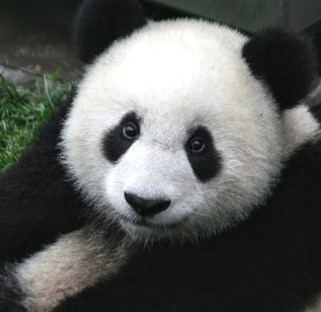

<hr style="height:2px;border-width:2;color:gray">

## INTRODUCTION

Pandas like other libraries like numpy already comes with Anaconda. Hence we can readily import it into our notebook. Generally people import pandas with an alias pd.
<div class="alert alert-block alert-info">
    In case you are using miniconda or are not able to import the library,<br>
    In your desired conda virtual environment, run the following command on your terminal:<br><br>
    <code>conda install pandas</code><br><br>
    or the following code in your notebook:<br><br>
    <code>!conda install pandas</code>
</div>

In [5]:
import pandas as pd
import numpy as np

Pandas has two main data structures:
<ol>
    <li><b>Series</b>: 1-Dimensional</li>
    <li><b>DataFrame</b>: 2-Dimensional</li>
</ol>

<hr style="height:2px;border-width:2;color:gray">

## SERIES

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index

### Creating a series

A series can be created using pd.Series() function.

In [6]:
#Using a python list to create a series
lst = [5, 3, 7, 8]
s = pd.Series(lst)
s

0    5
1    3
2    7
3    8
dtype: int64

The left column is index and the right column is values. Since we did not specify the index, the values were assigned their corresponding indices in the list.

In [7]:
#Assigning index while creating a series using index argument
lst = [5, 3, 7, 8] #From next time variables already declared in previous cells will be reused
s = pd.Series(lst, index = ['a', 'b', 'c', 'd'])
s

a    5
b    3
c    7
d    8
dtype: int64

Now 5, 3, 7 and 8 have indices a, b, c and d respectively.

To get the indices of a series, the Series.index method can be used. It returns an index object.

In [8]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Another way of creating a series is using python dictionaries. The key of the dictionary is treated as index.

In [9]:
data = {'p' : 6, 'q' : 7, 'r' : 3, 's' : 11}
s = pd.Series(data)
s

p     6
q     7
r     3
s    11
dtype: int64

### Querying a series

A series can be queried using the indexing operators loc and iloc. <b>loc</b> is used to query using the label indices in the series while <b>iloc</b> queries using integer indices.

In [10]:
s.loc['q'] #Selects value associated with index q in the series

7

In [11]:
s.iloc[3] #Selects value that is stored in 4th position (index 3) i.e element corresponding to index s

11

In [12]:
s['q'] #Shorthand for s.loc[]

7

In [13]:
s[3] #Shorthand for s.iloc[]

11

<div class="alert alert-block alert-warning">
    <b>Note:</b> It is generally better to use loc and iloc instead of shorthand operators to prevent ambiguity in case of the series having integer indices. But in most cases we'll be using non-integer indices and hence shorthand [] can be used.
    For more information check out <b>Indexers</b> section in <a href = "https://www.oreilly.com/content/data-indexing-and-selection/">Indexer link</a>
</div>

### Modifying a Series

In [14]:
s

p     6
q     7
r     3
s    11
dtype: int64

In [15]:
s['q'] = 7 #Changing values with index q from 5 to 7
s

p     6
q     7
r     3
s    11
dtype: int64

The index of a series can be altered by using in place assignment

In [16]:
s.index = ["A", "B", "C", "D"]
s

A     6
B     7
C     3
D    11
dtype: int64

### Boolean masking

In [17]:
s1 = pd.Series({'a':2, 'b':7, 'c':5, 'd':10})
s1

a     2
b     7
c     5
d    10
dtype: int64

In [18]:
(s1 > 5) #This returns a boolean series (with same indices) by elementwise comparison

a    False
b     True
c    False
d     True
dtype: bool

In [19]:
s2 = pd.Series({'a':3, 'b':5, 'c':5, 'd':11})
s2

a     3
b     5
c     5
d    11
dtype: int64

In [20]:
(s1 <= s2) #Two series can be compared element wise if they are identically labeled

a     True
b    False
c     True
d     True
dtype: bool

Now this boolean series can be used to apply a boolean mask to another series with same dimensions. When we apply a boolean mask it will print only that data in which we pass a boolean value True. Again the rule of indentically labeled must be followed.

In [21]:
s1[s1 > 5] #Returns all the values in s1 that are greater than 5

b     7
d    10
dtype: int64

In [22]:
s1[s1 <= s2] #Returns all the values in s1 that are less than or equal to corresponding values in s2

a     2
c     5
d    10
dtype: int64

### Functions and operations on series
It is important to note that operators and functions that work on numpy arrays work on pandas series too

In [23]:
s1

a     2
b     7
c     5
d    10
dtype: int64

In [24]:
s2

a     3
b     5
c     5
d    11
dtype: int64

In [25]:
s1 + 2 #Adding a scalar to a series

a     4
b     9
c     7
d    12
dtype: int64

In [26]:
s1 + s2 #Adding corresponding elements of two series

a     5
b    12
c    10
d    21
dtype: int64

In [27]:
np.sum(s1) 

24

In [28]:
np.mean(s2)

6.0

Equivalently these can be written as

In [29]:
s1.sum()

24

In [30]:
s1.mean()

6.0

So that's it for the Series data structure as of now. Next we'll head on to the 2-Dimensional data structure DataFrame.

<hr style="height:2px;border-width:2;color:gray">

## DATAFRAMES

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dictionary of Series all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. <br><br>
Most functions that are applied to DataFrames can also be applied to Series.<br><br>
A dataframe has two axes.<br>
axis = 0 refers to the vertical axis. It refers to rows of the dataframe. <code>index</code> refers to row index in atrributes of a function.<br>
axis = 1 refers to the horizontal axis. It refers to columns of the dataframe. <code>columns</code> refers to column indices (or column names) on attributes of a function

### SOME BASIC CONCEPTS

### Creating a DataFrame
Pandas Dataframes can be created using <code>pd.DataFrame()</code>. One of the most common ways of creating a dataframe is from a dictionary of equal-length lists or NumPy arrays. The keys are treated as column names.

In [31]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

Similar to a series, since we did not specify an index for the rows, default integer indices were assigned.<br><br>
Another way to create a dataframe is using a series for each row.

In [32]:
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df

Name Item Purchased  Cost
Store 1  Chris       Dog Food  22.5
Store 1  Kevyn   Kitty Litter   2.5
Store 2  Vinod      Bird Seed   5.0

Make sure to notice the differences between the two methods.

### Some basic functions on dataframes

In [33]:
#Creating a suitable dataframe
data = {'Val 1': [5, 8, 7, 6,  5, 3, 9],
        'Val 2': [3, 7, 9, 2, 9 , 1, 11],
        'Val 3': [2, 9, 12, 17, 8, 4, 23]}
df = pd.DataFrame(data)
df

Val 1  Val 2  Val 3
0      5      3      2
1      8      7      9
2      7      9     12
3      6      2     17
4      5      9      8
5      3      1      4
6      9     11     23

<code>df.head(n)</code> returns first n rows of a dataframe and <code>df.tail(n)</code> returns the last n rows of a dataframe. These are used mainly in case of large dataframes with hundreds of rows and we need to get an idea about the structure of the dataframe. If n is not specified first 5 or last 5 rows are returned.

In [34]:
df.head()

Val 1  Val 2  Val 3
0      5      3      2
1      8      7      9
2      7      9     12
3      6      2     17
4      5      9      8

In [35]:
df.tail(3)

Val 1  Val 2  Val 3
4      5      9      8
5      3      1      4
6      9     11     23

<code>df.describe()</code> is a function that gives the statistical summary of the dataframe.

In [36]:
df.describe()

Val 1      Val 2      Val 3
count  7.000000   7.000000   7.000000
mean   6.142857   6.000000  10.714286
std    2.035401   3.958114   7.341986
min    3.000000   1.000000   2.000000
25%    5.000000   2.500000   6.000000
50%    6.000000   7.000000   9.000000
75%    7.500000   9.000000  14.500000
max    9.000000  11.000000  23.000000

<code>df.info()</code> prints a concise summary of a DataFrame

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Val 1   7 non-null      int64
 1   Val 2   7 non-null      int64
 2   Val 3   7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


<code>df.T</code> is used to get the transpose of a dataframe

In [38]:
df.T

0  1   2   3  4  5   6
Val 1  5  8   7   6  5  3   9
Val 2  3  7   9   2  9  1  11
Val 3  2  9  12  17  8  4  23

In [39]:
df #Keep in mind that df.T doesn't change the original dataframe but creates a new dataframe

Val 1  Val 2  Val 3
0      5      3      2
1      8      7      9
2      7      9     12
3      6      2     17
4      5      9      8
5      3      1      4
6      9     11     23

### Querying

A dataframe is queried in similar manner to a series

In [40]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data, index = ['A', 'B', 'C', 'D', 'E', 'F'])
df

state  year  pop
A    Ohio  2000  1.5
B    Ohio  2001  1.7
C    Ohio  2002  3.6
D  Nevada  2001  2.4
E  Nevada  2002  2.9
F  Nevada  2003  3.2

In [41]:
df.loc['C', ['state', 'pop']] #The state and pop values of row C are returned in the form of a series

state    Ohio
pop       3.6
Name: C, dtype: object

In [42]:
df.loc[:, ['state', 'pop']] #The state and pop values of all rows are returned in the form of a dataframe

state  pop
A    Ohio  1.5
B    Ohio  1.7
C    Ohio  3.6
D  Nevada  2.4
E  Nevada  2.9
F  Nevada  3.2

In [43]:
df.iloc[2, 2] #Simalarly iloc also can be used

3.6

In [44]:
df['state'] #Querying a column using shorthand []

A      Ohio
B      Ohio
C      Ohio
D    Nevada
E    Nevada
F    Nevada
Name: state, dtype: object

In [45]:
df[['year', 'pop']] #Querying a set of columns

year  pop
A  2000  1.5
B  2001  1.7
C  2002  3.6
D  2001  2.4
E  2002  2.9
F  2003  3.2

Boolean masking works on a dataframe just like it does in a series

In [46]:
df[df['pop'] > 2] #Selecting rows with population greater than 2

state  year  pop
C    Ohio  2002  3.6
D  Nevada  2001  2.4
E  Nevada  2002  2.9
F  Nevada  2003  3.2

In [47]:
df[df['pop']>3]['state'] #Querying names of states with population greater than 2

C      Ohio
F    Nevada
Name: state, dtype: object

### Manipulation

In [48]:
df

state  year  pop
A    Ohio  2000  1.5
B    Ohio  2001  1.7
C    Ohio  2002  3.6
D  Nevada  2001  2.4
E  Nevada  2002  2.9
F  Nevada  2003  3.2

In [49]:
df.index #Returns an index objext of all rows

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [50]:
df.columns #Returns an index object of all columns

Index(['state', 'year', 'pop'], dtype='object')

In [51]:
#Renaming column name pop to population and state to State
df.rename(columns = {'pop': 'population', 'state': 'State'}, inplace = True)
df

State  year  population
A    Ohio  2000         1.5
B    Ohio  2001         1.7
C    Ohio  2002         3.6
D  Nevada  2001         2.4
E  Nevada  2002         2.9
F  Nevada  2003         3.2

<code>inplace = True</code> makes all the manipulations to the original dataframe itself. Most of the functions don't modify the dataframe if you don't specify inplace as True. So if you want to modify the orginal dataframe, either set <code>inplace = True</code> or reassign the new dataframe to the old variable like,<br><br>
<code>df = df.rename(columns = {'pop': 'population', 'state': 'State'})</code>
<br><br>
Also note that df.rename can also be used to rename indices

A column can be added the way you would add it to a dictionary

In [52]:
df['GDP'] = [7.4, 2.3, 4.5, 1.2, 3.9, 2.5]
df

State  year  population  GDP
A    Ohio  2000         1.5  7.4
B    Ohio  2001         1.7  2.3
C    Ohio  2002         3.6  4.5
D  Nevada  2001         2.4  1.2
E  Nevada  2002         2.9  3.9
F  Nevada  2003         3.2  2.5

A new column can hold values determined by existing columns

In [53]:
df['GDP per capita'] = (df['GDP']/ df['population'])
df

State  year  population  GDP  GDP per capita
A    Ohio  2000         1.5  7.4        4.933333
B    Ohio  2001         1.7  2.3        1.352941
C    Ohio  2002         3.6  4.5        1.250000
D  Nevada  2001         2.4  1.2        0.500000
E  Nevada  2002         2.9  3.9        1.344828
F  Nevada  2003         3.2  2.5        0.781250

In [54]:
#Adding a new row to the dataframe can be done in a similar way
df.loc['G'] = ['Texas', '2001', 2.5, 4.2, 1.68]
df

State  year  population  GDP  GDP per capita
A    Ohio  2000         1.5  7.4        4.933333
B    Ohio  2001         1.7  2.3        1.352941
C    Ohio  2002         3.6  4.5        1.250000
D  Nevada  2001         2.4  1.2        0.500000
E  Nevada  2002         2.9  3.9        1.344828
F  Nevada  2003         3.2  2.5        0.781250
G   Texas  2001         2.5  4.2        1.680000

### df.drop()

In [55]:
#Drops columns GDP and GDP per capita
df.drop(columns = ['GDP', 'GDP per capita'], inplace = True)
df

State  year  population
A    Ohio  2000         1.5
B    Ohio  2001         1.7
C    Ohio  2002         3.6
D  Nevada  2001         2.4
E  Nevada  2002         2.9
F  Nevada  2003         3.2
G   Texas  2001         2.5

In [56]:
#Drops row 'G'
df.drop(index = 'G')

State  year  population
A    Ohio  2000         1.5
B    Ohio  2001         1.7
C    Ohio  2002         3.6
D  Nevada  2001         2.4
E  Nevada  2002         2.9
F  Nevada  2003         3.2

In [57]:
df

State  year  population
A    Ohio  2000         1.5
B    Ohio  2001         1.7
C    Ohio  2002         3.6
D  Nevada  2001         2.4
E  Nevada  2002         2.9
F  Nevada  2003         3.2
G   Texas  2001         2.5

Since <code>inplace</code> is <code>False</code> by default, the row still exists in the dataframe

## SOME NOT SO BASIC CONCEPTS

### Reading from files
In Data Science and ML, the data is obtained in files like csv, excel, text etc.<br>
One of the most common kind of file is csv or comma separated values.<br><br>
There should be a file called <code>census.csv</code> in the current folder. Go ahead and open it in notepad to get an idea how csv files exist.<br><br>
Now I'd like to make you familiar with the pandas documentaion as you'll be using it a lot in the future. Go ahead and open this <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">link</a> and check out the function we are going to use. The documentation has the information about the function and all its attributes.<br><br>
<code>pd.read_csv()</code> has a lot of attributes and gives us a lot of control on how to read our csv file into a dataframe.
<br><br>
You can also get help inside the notebook regarding a function like this. Make sure to close it before moving on

In [58]:
pd.read_csv?

In [59]:
#Reading census.csv into dataframe df
df = pd.read_csv("census.csv")
df

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
0         40       3         6      1       0  Alabama            Alabama   
1         50       3         6      1       1  Alabama     Autauga County   
2         50       3         6      1       3  Alabama     Baldwin County   
3         50       3         6      1       5  Alabama     Barbour County   
4         50       3         6      1       7  Alabama        Bibb County   
...      ...     ...       ...    ...     ...      ...                ...   
3188      50       4         8     56      37  Wyoming  Sweetwater County   
3189      50       4         8     56      39  Wyoming       Teton County   
3190      50       4         8     56      41  Wyoming       Uinta County   
3191      50       4         8     56      43  Wyoming    Washakie County   
3192      50       4         8     56      45  Wyoming      Weston County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  \
0           4779736            4780127          4785161  ...   
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
0             0.002295         -0.193196          0.381066          0.582002   
1             7.242091         -2.915927         -3.012349          2.265971   
2            14.832960         17.647293         21.845705         19.243287   
3            -4.728132         -2.500690         -7.056824         -3.904217   
4            -5.527043         -5.068871         -6.201001         -0.177537   
...                ...               ...               ...               ...   
3188          1.072643         16.243199         -5.339774        -14.252889   
3189         -1.589565          0.972695         19.525929         14.143021   
3190        -17.755986         -4.916350         -6.902954        -14.215862   
3191        -11.637475         -0.827815         -2.013502        -17.781491   
3192        -11.752361         -8.040059         12.372583          1.533635   

      RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0            -0.467369     1.030015     0.826644     1.383282     1.724718   
1            -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2            17.197872    15.844176    18.559627    22.727626    20.317142   
3           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
...                ...          ...          ...          ...          ...   
3188        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3189         -0.564849     0.654527     2.408578    21.160658    16.308671   
3190        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3191          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3192          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      RNETMIG2015  
0        0.712594  
1       -2.187333  
2       18.293499  
3      -10.543299  
4        1.107861  
...           ...  
3188   -14.070195  
3189     1.520747  
3190   -12.606351  
3191     1.441961  
3192     6.935294  

[3193 rows x 100 columns]

<div class="alert alert-block alert-warning">
    <b>Note:</b> If the file to read is stored in current folder, only filename is enough to read it. If it is saved in some other folder, entire file path must be given.
</div>

One of the most important attributes is <code>skiprows</code> which skips rows in the csv file. Read the documentation attribute description to see how it exactly works.

In [60]:
#Skipping rows with inidices 1 to 3
df = pd.read_csv("census.csv", skiprows = range(1,4))
df

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
0         50       3         6      1       5  Alabama     Barbour County   
1         50       3         6      1       7  Alabama        Bibb County   
2         50       3         6      1       9  Alabama      Blount County   
3         50       3         6      1      11  Alabama     Bullock County   
4         50       3         6      1      13  Alabama      Butler County   
...      ...     ...       ...    ...     ...      ...                ...   
3185      50       4         8     56      37  Wyoming  Sweetwater County   
3186      50       4         8     56      39  Wyoming       Teton County   
3187      50       4         8     56      41  Wyoming       Uinta County   
3188      50       4         8     56      43  Wyoming    Washakie County   
3189      50       4         8     56      45  Wyoming      Weston County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  \
0             27457              27457            27341  ...   
1             22915              22919            22861  ...   
2             57322              57322            57373  ...   
3             10914              10915            10887  ...   
4             20947              20946            20944  ...   
...             ...                ...              ...  ...   
3185          43806              43806            43593  ...   
3186          21294              21294            21297  ...   
3187          21118              21118            21102  ...   
3188           8533               8533             8545  ...   
3189           7208               7208             7181  ...   

      RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
0            -4.728132         -2.500690         -7.056824         -3.904217   
1            -5.527043         -5.068871         -6.201001         -0.177537   
2             1.807375         -1.177622         -1.748766         -2.062535   
3           -30.953709         -5.180127         -1.130263         14.354290   
4           -14.032727        -11.684234         -5.655413          1.085428   
...                ...               ...               ...               ...   
3185          1.072643         16.243199         -5.339774        -14.252889   
3186         -1.589565          0.972695         19.525929         14.143021   
3187        -17.755986         -4.916350         -6.902954        -14.215862   
3188        -11.637475         -0.827815         -2.013502        -17.781491   
3189        -11.752361         -8.040059         12.372583          1.533635   

      RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
1             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
2            -1.369970     1.859511    -0.848580    -1.402476    -1.577232   
3           -16.167247   -29.001673    -2.825524     1.507017    17.243790   
4            -6.529805   -13.936612   -11.586865    -5.557058     1.184103   
...                ...          ...          ...          ...          ...   
3185        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3186         -0.564849     0.654527     2.408578    21.160658    16.308671   
3187        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3188          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3189          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      RNETMIG2015  
0      -10.543299  
1        1.107861  
2       -0.884411  
3      -13.193961  
4       -6.430868  
...           ...  
3185   -14.070195  
3186     1.520747  
3187   -12.606351  
3188     1.441961  
3189     6.935294  

[3190 rows x 100 columns]

### Reindexing and Hierarchical indexing

In [61]:
df = pd.read_csv('census.csv')
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RDOMESTICMIG2011  \
0        4779736            4780127          4785161  ...          0.002295   
1          54571              54571            54660  ...          7.242091   
2         182265             182265           183193  ...         14.832960   
3          27457              27457            27341  ...         -4.728132   
4          22915              22919            22861  ...         -5.527043   

   RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
0         -0.193196          0.381066          0.582002         -0.467369   
1         -2.915927         -3.012349          2.265971         -2.530799   
2         17.647293         21.845705         19.243287         17.197872   
3         -2.500690         -7.056824         -3.904217        -10.543299   
4         -5.068871         -6.201001         -0.177537          0.177258   

   RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
0     1.030015     0.826644     1.383282     1.724718     0.712594  
1     7.606016    -2.626146    -2.722002     2.592270    -2.187333  
2    15.844176    18.559627    22.727626    20.317142    18.293499  
3    -4.874741    -2.758113    -7.167664    -3.978583   -10.543299  
4    -5.088389    -4.363636    -5.403729     0.754533     1.107861  

[5 rows x 100 columns]

Reindexing is the process of changing the index of a dataframe to one or more columns. A particular column or columns can be set as index using <code>df.set_index()</code>.

In [62]:
df = df.set_index('STNAME') 
#df.set_index() creates a new dataframe and hence to reflect changes it is assigned to same dataframe
df

SUMLEV  REGION  DIVISION  STATE  COUNTY            CTYNAME  \
STNAME                                                                
Alabama      40       3         6      1       0            Alabama   
Alabama      50       3         6      1       1     Autauga County   
Alabama      50       3         6      1       3     Baldwin County   
Alabama      50       3         6      1       5     Barbour County   
Alabama      50       3         6      1       7        Bibb County   
...         ...     ...       ...    ...     ...                ...   
Wyoming      50       4         8     56      37  Sweetwater County   
Wyoming      50       4         8     56      39       Teton County   
Wyoming      50       4         8     56      41       Uinta County   
Wyoming      50       4         8     56      43    Washakie County   
Wyoming      50       4         8     56      45      Weston County   

         CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  \
STNAME                                                                        
Alabama        4779736            4780127          4785161          4801108   
Alabama          54571              54571            54660            55253   
Alabama         182265             182265           183193           186659   
Alabama          27457              27457            27341            27226   
Alabama          22915              22919            22861            22733   
...                ...                ...              ...              ...   
Wyoming          43806              43806            43593            44041   
Wyoming          21294              21294            21297            21482   
Wyoming          21118              21118            21102            20912   
Wyoming           8533               8533             8545             8469   
Wyoming           7208               7208             7181             7114   

         ...  RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME   ...                                                         
Alabama  ...          0.002295         -0.193196          0.381066   
Alabama  ...          7.242091         -2.915927         -3.012349   
Alabama  ...         14.832960         17.647293         21.845705   
Alabama  ...         -4.728132         -2.500690         -7.056824   
Alabama  ...         -5.527043         -5.068871         -6.201001   
...      ...               ...               ...               ...   
Wyoming  ...          1.072643         16.243199         -5.339774   
Wyoming  ...         -1.589565          0.972695         19.525929   
Wyoming  ...        -17.755986         -4.916350         -6.902954   
Wyoming  ...        -11.637475         -0.827815         -2.013502   
Wyoming  ...        -11.752361         -8.040059         12.372583   

         RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME                                                                  
Alabama          0.582002         -0.467369     1.030015     0.826644   
Alabama          2.265971         -2.530799     7.606016    -2.626146   
Alabama         19.243287         17.197872    15.844176    18.559627   
Alabama         -3.904217        -10.543299    -4.874741    -2.758113   
Alabama         -0.177537          0.177258    -5.088389    -4.363636   
...                   ...               ...          ...          ...   
Wyoming        -14.252889        -14.248864     1.255221    16.243199   
Wyoming         14.143021         -0.564849     0.654527     2.408578   
Wyoming        -14.215862        -12.127022   -18.136812    -5.536861   
Wyoming        -17.781491          1.682288   -11.990126    -1.182592   
Wyoming          1.533635          6.935294   -12.032179    -8.040059   

         RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME                                          
Alabama     1.383282     1.724718     0.712594  
Alabama    -2.722002     2.592270    -2.187333  


<code>df.reset_index()</code> does the opposite of <code>df.set_index()</code> and sets the index of dataframe back to integer indices

In [63]:
df = df.reset_index()
df

STNAME  SUMLEV  REGION  DIVISION  STATE  COUNTY            CTYNAME  \
0     Alabama      40       3         6      1       0            Alabama   
1     Alabama      50       3         6      1       1     Autauga County   
2     Alabama      50       3         6      1       3     Baldwin County   
3     Alabama      50       3         6      1       5     Barbour County   
4     Alabama      50       3         6      1       7        Bibb County   
...       ...     ...     ...       ...    ...     ...                ...   
3188  Wyoming      50       4         8     56      37  Sweetwater County   
3189  Wyoming      50       4         8     56      39       Teton County   
3190  Wyoming      50       4         8     56      41       Uinta County   
3191  Wyoming      50       4         8     56      43    Washakie County   
3192  Wyoming      50       4         8     56      45      Weston County   

      CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  \
0           4779736            4780127          4785161  ...   
1             54571              54571            54660  ...   
2            182265             182265           183193  ...   
3             27457              27457            27341  ...   
4             22915              22919            22861  ...   
...             ...                ...              ...  ...   
3188          43806              43806            43593  ...   
3189          21294              21294            21297  ...   
3190          21118              21118            21102  ...   
3191           8533               8533             8545  ...   
3192           7208               7208             7181  ...   

      RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  RDOMESTICMIG2014  \
0             0.002295         -0.193196          0.381066          0.582002   
1             7.242091         -2.915927         -3.012349          2.265971   
2            14.832960         17.647293         21.845705         19.243287   
3            -4.728132         -2.500690         -7.056824         -3.904217   
4            -5.527043         -5.068871         -6.201001         -0.177537   
...                ...               ...               ...               ...   
3188          1.072643         16.243199         -5.339774        -14.252889   
3189         -1.589565          0.972695         19.525929         14.143021   
3190        -17.755986         -4.916350         -6.902954        -14.215862   
3191        -11.637475         -0.827815         -2.013502        -17.781491   
3192        -11.752361         -8.040059         12.372583          1.533635   

      RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
0            -0.467369     1.030015     0.826644     1.383282     1.724718   
1            -2.530799     7.606016    -2.626146    -2.722002     2.592270   
2            17.197872    15.844176    18.559627    22.727626    20.317142   
3           -10.543299    -4.874741    -2.758113    -7.167664    -3.978583   
4             0.177258    -5.088389    -4.363636    -5.403729     0.754533   
...                ...          ...          ...          ...          ...   
3188        -14.248864     1.255221    16.243199    -5.295460   -14.075283   
3189         -0.564849     0.654527     2.408578    21.160658    16.308671   
3190        -12.127022   -18.136812    -5.536861    -7.521840   -14.740608   
3191          1.682288   -11.990126    -1.182592    -2.250385   -18.020168   
3192          6.935294   -12.032179    -8.040059    12.372583     1.533635   

      RNETMIG2015  
0        0.712594  
1       -2.187333  
2       18.293499  
3      -10.543299  
4        1.107861  
...           ...  
3188   -14.070195  
3189     1.520747  
3190   -12.606351  
3191     1.441961  
3192     6.935294  

[3193 rows x 100 columns]

When two or more columns are given as a list to <code>df.set_index()</code>, hierarchical indexing can be observed.

In [64]:
df = df.set_index(['STNAME', 'CTYNAME'])
df

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Alabama                40       3         6      1       0   
        Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Alabama                  4779736            4780127          4785161   
        Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Barbour County             27457              27457            27341   
        Bibb County                22915              22919            22861   
...                                  ...                ...              ...   
Wyoming Sweetwater County          43806              43806            43593   
        Teton County               21294              21294            21297   
        Uinta County               21118              21118            21102   
        Washakie County             8533               8533             8545   
        Weston County               7208               7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Alabama                    4801108          4816089  ...   
        Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Alabama                    0.002295         -0.193196   
        Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Alabama                    0.381066          0.582002   
        Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour Cou

### df.apply()
<code>df.apply()</code> applies a function along an axis of a dataframe.

In [65]:
df

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Alabama                40       3         6      1       0   
        Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Alabama                  4779736            4780127          4785161   
        Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Barbour County             27457              27457            27341   
        Bibb County                22915              22919            22861   
...                                  ...                ...              ...   
Wyoming Sweetwater County          43806              43806            43593   
        Teton County               21294              21294            21297   
        Uinta County               21118              21118            21102   
        Washakie County             8533               8533             8545   
        Weston County               7208               7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Alabama                    4801108          4816089  ...   
        Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Alabama                    0.002295         -0.193196   
        Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Alabama                    0.381066          0.582002   
        Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour Cou

In [66]:
df_sum = df.apply(sum, axis = 0) #Sum along 0 axis (vertical axis)
df_sum

SUMLEV         159140.000000
REGION           8521.000000
DIVISION        16576.000000
STATE           96617.000000
COUNTY         325426.000000
                   ...      
RNETMIG2011     -2092.070943
RNETMIG2012     -4616.358019
RNETMIG2013      -639.938676
RNETMIG2014     -3317.398704
RNETMIG2015      -308.949947
Length: 98, dtype: float64

Generally python lambda functions as custom created functions. Read more about lambda functions <a href = "https://www.geeksforgeeks.org/python-lambda/">here</a> and further applications of <code>df.apply()</code> <a href = "https://www.w3resource.com/pandas/dataframe/dataframe-apply.php">here</a>.

### Sorting
A dataframe can be sorted in two ways.<br>
1. <code>sort_index()</code> : Sorts the rows or columns of a dataframe by index.
2. <code>sort_values()</code> : Sorts the rows by values of one or more columns.

In [67]:
df = pd.DataFrame({"Fruit": ["Mango", "Banana", "Apple"], "Price": [35, 14, 35]}, index = ["B", "C", "A"])
df

Fruit  Price
B   Mango     35
C  Banana     14
A   Apple     35

In [68]:
df.sort_index(axis = 0)

Fruit  Price
A   Apple     35
B   Mango     35
C  Banana     14

In [69]:
df.sort_index(axis = 1, ascending = False) #Sort columns in Descending order

Price   Fruit
B     35   Mango
C     14  Banana
A     35   Apple

In [70]:
df.sort_values(by = ["Price", "Fruit"]) #Sorts first by price and then by fruit name

Fruit  Price
C  Banana     14
A   Apple     35
B   Mango     35

### df.groupby()
Groupby is one of the most important functions that will be used in the data handling process.<br>
Groupby operation is used to perform a split-apply-combine process on a pandas object (Series or DataFrame). The object is first <b>split</b> into groups and a function is <b>applied</b> on each group. Finally all the groups are <b>combined</b> to form another pandas object.
The following image should give some clarity
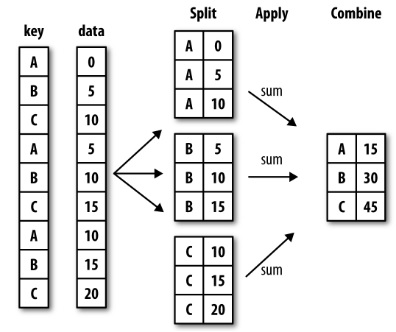

In [71]:
df = pd.DataFrame( {'key' : ['one', 'two', 'one', 'two', 'one'], 
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df


key     data1     data2
0  one  1.396733 -0.381292
1  two -0.009793  1.529142
2  one -1.629292  0.085600
3  two  1.241481  1.214460
4  one -1.026713  1.673347

In [72]:
#Grouping rows having same key
df.groupby('key')

In [73]:
#Sum of values in same group using sum()
df.groupby('key').sum()
#You can also use other aggregate functions like mean, std etc.

data1     data2
key                    
one -1.259272  1.377655
two  1.231688  2.743603

This is just one way of using grouby. Groupby is a very powerful function which is extensively used and can be confusing at times. The objects can also be grouped by function, series, dictionaries. So I recommend you go through this <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">Documentation</a> and this <a href = "https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html">Guide</a>.

## CLEANING DATA

Most of the real world data is not analysis ready and hence ML models cannot be applied. The data may contain missing data, duplicate data and many other issues and hence pandas gives certain tools to handle this.

### Missing Data
In a pandas, a missing value or python <code>None</code> is treated as a numpy Not a Number i.e, <code>np.NaN</code> and these can resolved in different ways based on the scenario.

In [74]:
df = pd.DataFrame([[1., 6.5, 3.], [1., None, None], [None, None, None], [None, 6.5, 3.]])
df

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      float64
 1   1       2 non-null      float64
 2   2       2 non-null      float64
dtypes: float64(3)
memory usage: 224.0 bytes


In [76]:
#Dropping all rows containing null value
df.dropna()

0    1    2
0  1.0  6.5  3.0

In [77]:
#Filling missing value using a particular value
df.fillna(5)

0    1    2
0  1.0  6.5  3.0
1  1.0  5.0  5.0
2  5.0  5.0  5.0
3  5.0  6.5  3.0

In [78]:
#Filling missing value using forward fill which fills the NaN with previous numerical values
df.fillna(method = 'ffill')

0    1    2
0  1.0  6.5  3.0
1  1.0  6.5  3.0
2  1.0  6.5  3.0
3  1.0  6.5  3.0

There are other methods of filling which you can checkout in documentation

### Duplicate Data

In [79]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
df

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4

In [80]:
df.drop_duplicates() #Drops all duplicate rows

k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4

## MERGING DATAFRAMES
Another useful operation on dataframes is merging of two dataframes.

In [81]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df1

key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

In [82]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

key  data2
0   a      0
1   b      1
2   d      2

In [83]:
pd.merge(df1, df2, on = 'key', how = 'outer')

key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0

In [84]:
pd.merge(df1, df2, on = 'key', how = 'inner')

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

<code>pd.merge()</code> merges two dataframes. The <code>on</code> attribute tells on which column or row the dataframe needs to be merged. <code>how</code> tells you how the joining is done. "outer" is equivalent to union between two sets and "inner" is equivalent to intersection between two sets (which you may have already noticed in the above example.

There are many more attributes in <code>pd.merge()</code> which may be useful. This is a <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html">link</a> to it's documentation.<br>
At this point I realize I'm asking you to look through the documentation a lot but looking through the documentation is a very important skill for any developer. Developing that skill is also one of the goals of this course.

#### So that's it for pandas for now. Hope you learnt something new. As I already told, Google is your friend. This notebook acts as an introductory guide. If you don't remember syntax of any function feel free to Google it.